# Análise dos dados de pagamento de gorjetas


## Importando base de dados

In [142]:
import pandas as pd

In [143]:
dados = pd.read_csv('tips.csv')

## Tradução

In [144]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [145]:
renomear={'total_bill' : 'total_conta',
          'tip' : 'gorjeta', 
          'dessert' : 'sobremesa',
          'day' : 'dia_semana',
          'time' : 'hora_dia',
          'size' : 'n_pessoas'
}

In [146]:
gorjetas = dados.rename(columns = renomear)

In [147]:
sim_nao = {
    'No' : 'Não',
    'Yes' : 'Sim'
}

In [148]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [149]:
gorjetas.dia_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [150]:
dias = {
    'Sun' : 'Domingo',
    'Sat' : 'Sábado',
    'Thur' : 'Quinta',
    'Fri' : 'Sexta'
}

In [151]:
gorjetas.dia_semana = gorjetas.dia_semana.map(dias)

In [152]:
gorjetas.hora_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [153]:
hora = {
    'Dinner' : 'Jantar',
    'Lunch' : 'Almoço'
}

In [154]:
gorjetas.hora_dia = gorjetas.hora_dia.map(hora)

In [155]:
gorjetas.head(1)

,total_conta,gorjeta,sobremesa,dia_semana,hora_dia,n_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


In [156]:
!pip install seaborn==0.9.0

In [157]:
import seaborn as sns

In [158]:
!pip show seaborn

Name: seaborn
Version: 0.9.0
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: /usr/local/lib/python3.7/dist-packages
Requires: numpy, matplotlib, pandas, scipy
Required-by: missingno


# Análise 1 - Valor da conta e Gorjeta

In [159]:
gorjetas.columns

Index(['total_conta', 'gorjeta', 'sobremesa', 'dia_semana', 'hora_dia',
       'n_pessoas'],
      dtype='object')

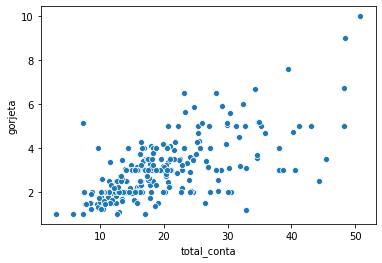

In [160]:
valor_gorjeta = sns.scatterplot(x='total_conta', y='gorjeta', data=gorjetas)

## Criando o campo porcentagem

In [161]:
gorjetas.head(1)

,total_conta,gorjeta,sobremesa,dia_semana,hora_dia,n_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


In [162]:
gorjetas['porcentagem'] = gorjetas['gorjeta'] / gorjetas['total_conta']

In [163]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)

In [164]:
gorjetas.porcentagem = gorjetas.porcentagem * 100

In [165]:
gorjetas.head(1)

,total_conta,gorjeta,sobremesa,dia_semana,hora_dia,n_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,6.0


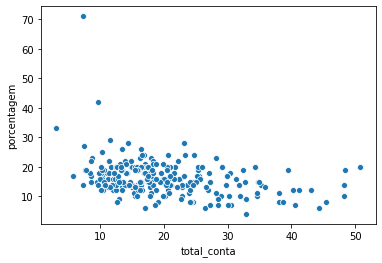

In [166]:
porcentagem_conta = sns.scatterplot(x='total_conta', y='porcentagem', data=gorjetas)

A gorjeta não é proporcional ao valor da conta.

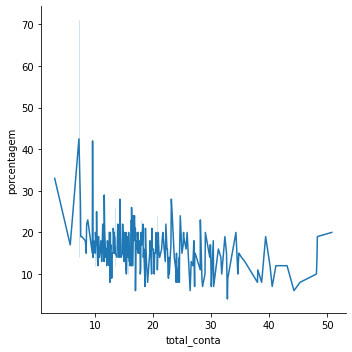

In [167]:
porcentagem_conta_linha = sns.relplot(x='total_conta', y='porcentagem', kind='line', data=gorjetas)

In [168]:
porcentagem_conta.figure.suptitle('Valor da conta x Gorjeta')

Text(0.5, 0.98, 'Valor da conta x Gorjeta')

In [169]:
porcentagem_conta.set_title('Análise do valor da gorjeta em função do valor da conta')

Text(0.5, 1.0, 'Análise do valor da gorjeta em função do valor da conta')

In [170]:
porcentagem_conta.set(xlabel='Valor da Conta', ylabel='Valor da Gorjeta')

[Text(17.200000000000003, 0.5, 'Valor da Gorjeta'),
 Text(0.5, 18.106250000000003, 'Valor da Conta')]

In [171]:
porcentagem_conta_linha.set(xlabel='Valor da Conta', ylabel='Valor da Gorjeta')

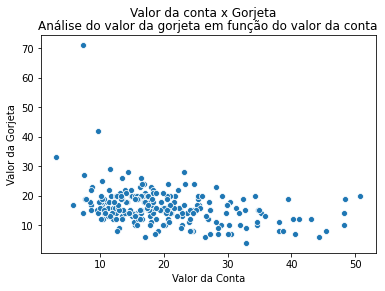

In [172]:
porcentagem_conta.get_figure()

# Análise 2 - Relação sobremesa x gorjeta

In [173]:
gorjetas.head(3)

,total_conta,gorjeta,sobremesa,dia_semana,hora_dia,n_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,6.0
1,10.34,1.66,Não,Domingo,Jantar,3,16.0
2,21.01,3.50,Não,Domingo,Jantar,3,17.0


In [174]:
gorjetas[gorjetas.sobremesa == 'Sim'].describe()

,total_conta,gorjeta,n_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,16.322581
std,9.832154,1.401468,0.810751,8.505959
min,3.070000,1.000000,1.000000,4.000000
25%,13.420000,2.000000,2.000000,11.000000
50%,17.920000,3.000000,2.000000,15.000000
75%,26.860000,3.680000,3.000000,20.000000
max,50.810000,10.000000,5.000000,71.000000


In [175]:
gorjetas[gorjetas.sobremesa == 'Não'].describe()

,total_conta,gorjeta,n_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,15.953642
std,8.255582,1.377190,1.017984,3.988881
min,7.250000,1.000000,1.000000,6.000000
25%,13.325000,2.000000,2.000000,14.000000
50%,17.590000,2.740000,2.000000,16.000000
75%,22.755000,3.505000,3.000000,18.500000
max,48.330000,9.000000,6.000000,29.000000


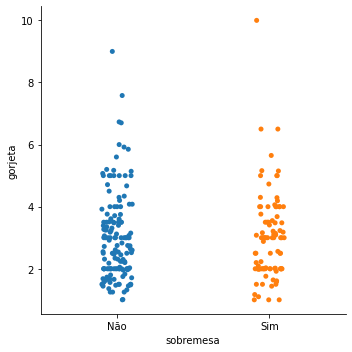

In [176]:
sns.catplot(x='sobremesa', y='gorjeta', data=gorjetas)

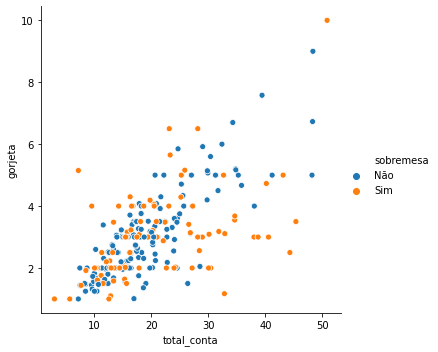

In [177]:
sns.relplot(x='total_conta', y='gorjeta', hue='sobremesa', data=gorjetas)

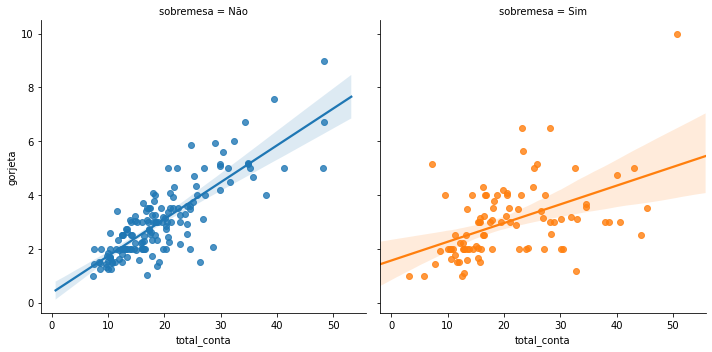

In [178]:
sns.lmplot(x='total_conta', y='gorjeta', col='sobremesa', hue='sobremesa', data=gorjetas)

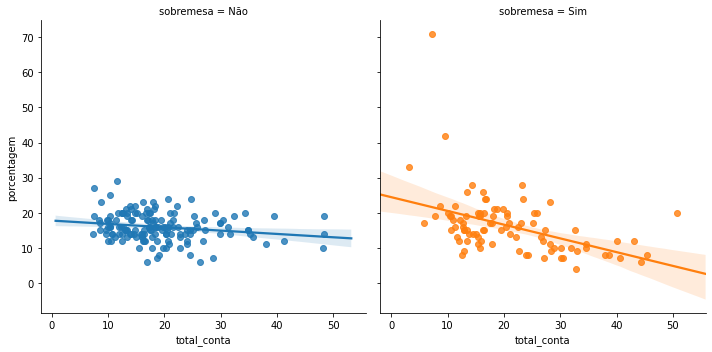

In [179]:
sns.lmplot(x='total_conta', y='porcentagem', col='sobremesa', hue='sobremesa', data=gorjetas)

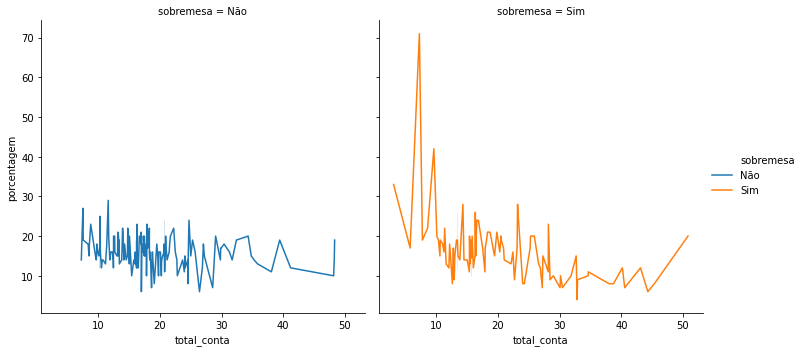

In [180]:
sns.relplot(x='total_conta', y='porcentagem', col='sobremesa', kind='line', hue='sobremesa', data=gorjetas)

Claramente demonstra uma diferença do valor de gorjeta com base na sobremesa.

## Teste de hipótese

**H<sup>null</sup>**
>**A distribuição da taxa da gorjeta é a mesma nos dois grupos**

**H<sup>alt</sup>**
>**A distribuição da taxa da gorjeta não é a mesma nos dois grupos**

In [181]:
from scipy.stats import ranksums

In [182]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem

In [183]:
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem

In [184]:
r = ranksums(sobremesa, sem_sobremesa)
print(f'O valor do p-value é {r.pvalue.round(3)}')

O valor do p-value é 0.527


Não se atribui hipótese alternativa, pois o pvalue > 0.05

# Análise 3 - Dias da semana

In [185]:
gorjetas.dia_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

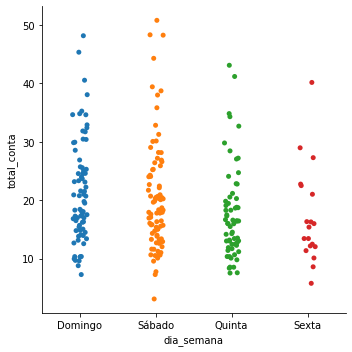

In [186]:
sns.catplot(x='dia_semana', y='total_conta', data=gorjetas)

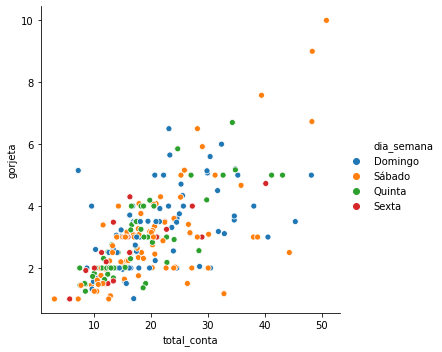

In [187]:
sns.relplot(x='total_conta', y='gorjeta', hue='dia_semana', data=gorjetas)

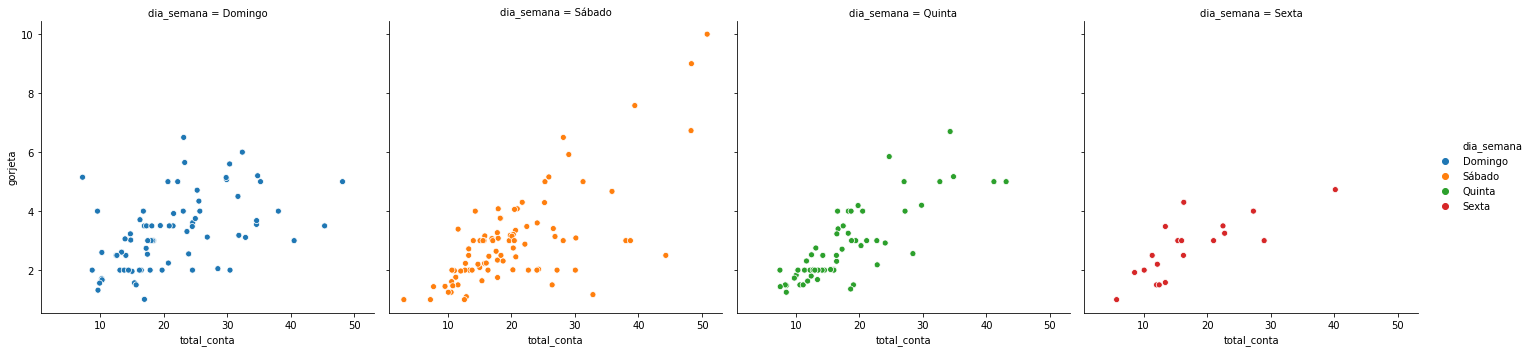

In [188]:
sns.relplot(x='total_conta', y='gorjeta', col='dia_semana', hue='dia_semana', data=gorjetas)

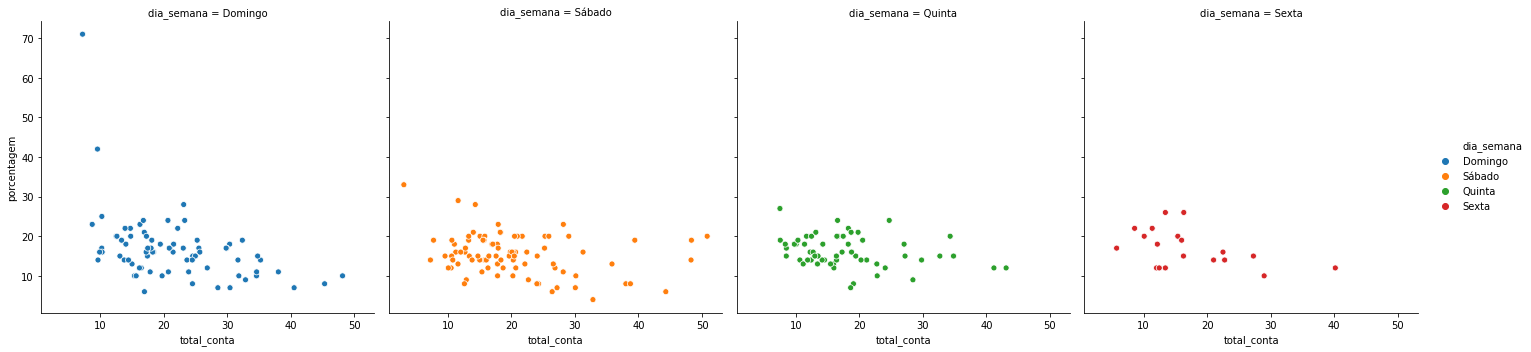

In [189]:
sns.relplot(x='total_conta', y='porcentagem', col='dia_semana', hue='dia_semana', data=gorjetas)

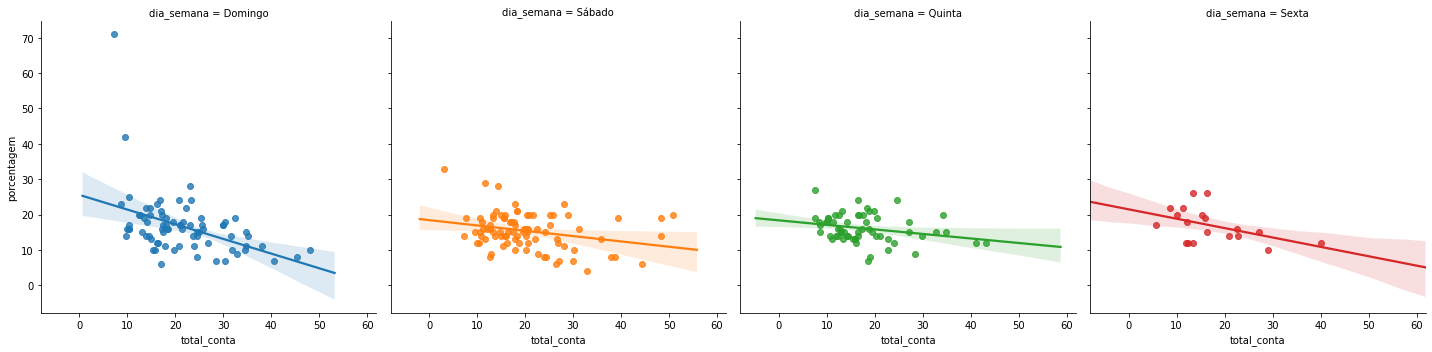

In [190]:
sns.lmplot(x='total_conta', y='porcentagem', col='dia_semana', hue='dia_semana', data=gorjetas)

In [191]:
media_geral_gorjetas = gorjetas.gorjeta.mean()
print(f'A média geral das gorjetas é: {media_geral_gorjetas}')

A média geral das gorjetas é: 2.9982786885245902


In [192]:
gorjetas.groupby(['dia_semana']).mean()[['total_conta', 'gorjeta', 'porcentagem']]

,total_conta,gorjeta,porcentagem
dia_semana,,,
Domingo,21.410000,3.255132,16.697368
Quinta,17.682742,2.771452,16.112903
Sexta,17.151579,2.734737,16.947368
Sábado,20.441379,2.993103,15.367816


In [193]:
print('Frequência dos dias')
gorjetas.dia_semana.value_counts()

Frequência dos dias


Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_semana, dtype: int64

## Teste de hipótese

**H<sup>null</sup>**
>**A distribuição do valor da conta é a mesma no sábado e no domingo**

**H<sup>alt</sup>**
>**A distribuição do valor da conta não é a mesma no sábado e no domingo**

In [194]:
valor_conta_domingo = gorjetas.query("dia_semana == 'Domingo'").total_conta
valor_conta_sabado = gorjetas.query("dia_semana == 'Sábado'").total_conta

In [195]:
rs_valor_conta = ranksums(valor_conta_domingo,valor_conta_sabado)
print(f'O valor do p-value é {rs_valor_conta.pvalue.round(3)}')

O valor do p-value é 0.358


**H<sup>null</sup>**
>**A distribuição do valor da conta é a mesma no sábado e no domingo**

# Análise 4 - Hora do dia X Gorjeta

In [196]:
gorjetas.head(1)

,total_conta,gorjeta,sobremesa,dia_semana,hora_dia,n_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,6.0


In [197]:
gorjetas.hora_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

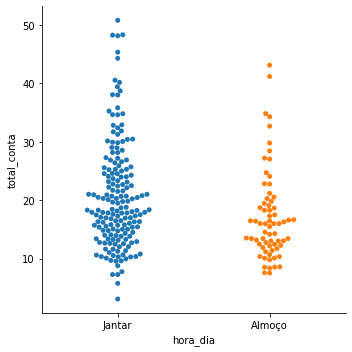

In [201]:
sns.catplot(x='hora_dia', y='total_conta', kind='swarm', data=gorjetas)

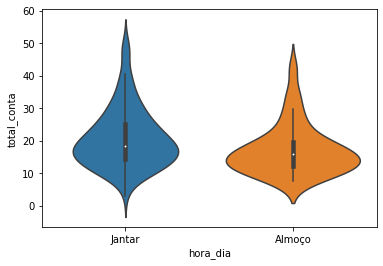

In [202]:
sns.violinplot(x='hora_dia', y='total_conta', data=gorjetas)

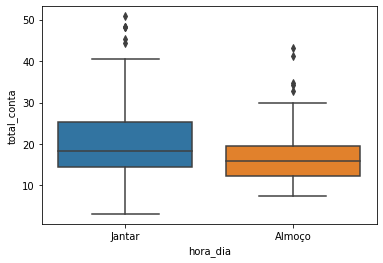

In [204]:
sns.boxplot(x='hora_dia', y='total_conta', data=gorjetas)

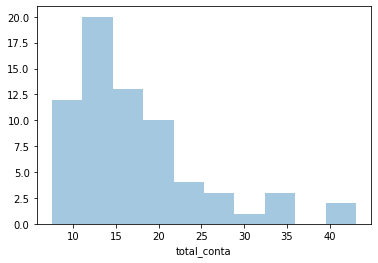

In [211]:
almoco = gorjetas.query("hora_dia == 'Almoço'").total_conta
sns.distplot(almoco, kde=False)

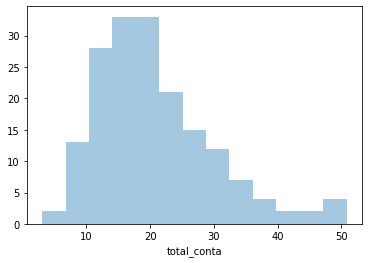

In [213]:
jantar = gorjetas.query("hora_dia == 'Jantar'").total_conta
sns.distplot(jantar, kde=False)

In [216]:
gorjetas.groupby(['hora_dia']).mean()[['total_conta', 'gorjeta', 'porcentagem']]

,total_conta,gorjeta,porcentagem
hora_dia,,,
Almoço,17.168676,2.728088,16.397059
Jantar,20.797159,3.102670,15.977273


## Teste de hipótese

**H<sup>null</sup>** 
>**A distribuição do valor da conta é a mesma no jantar e no almoço** 

**H<sup>alt</sup>** 
>**A distribuição do valor da conta não é a mesma no jantar e no almoço**

In [220]:
r_hora = ranksums(jantar, almoco)
print(f'O p-value é: {r_hora.pvalue.round(4)}')

O p-value é: 0.0012


Sendo assim, seguimos com a hipótese alternativa.
**H<sup>alt</sup>** 
>**A distribuição do valor da conta não é a mesma no jantar e no almoço**

--------------------------------------------------------------------------------

**H<sup>null</sup>** 
>**A distribuição da taxa da gorjeta é a mesma no jantar e no almoço** 

**H<sup>alt</sup>** 
>**A distribuição da taxa da gorjeta não é a mesma no jantar e no almoço**

In [226]:
porcentagem_almoco = gorjetas.query("hora_dia == 'Almoço'").porcentagem
porcentagem_jantar = gorjetas.query("hora_dia == 'Jantar'").porcentagem

In [231]:
r_porcentagem_hora = ranksums(porcentagem_almoco, porcentagem_jantar)
print(f'O p-value foi {r_porcentagem_hora.pvalue}')

O p-value foi 0.2602493995587126


**H<sup>null</sup>** 
>**A distribuição da taxa da gorjeta é a mesma no jantar e no almoço** 